<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/newtaipei_textcluster_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.22 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Visualization for Text Clusters (New Taipei)**

Before visualizing text clusters, see how to get the clustering results from
[hierarchical clustering](https://github.com/angel870326/Hierarchical-Clustering/blob/main/newtaipei_hierarchical_text.ipynb) in details, or you can use [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

<br/>

####**Contents:**

1. Read file with clustering results
2. Tf-idf vectorizer
3. Cosine similarity & distance
4. Dimension Reduction with PCA
5. Scatter Plot
6. Multidimentional scaling (MDS) ****NEW***

<br/>

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#**1. Read file with clustering results**


---



In [2]:
import numpy as np
import pandas as pd

cluster_result = pd.read_csv('/content/gdrive/MyDrive/碩一下/Capstone/hierarchical_clustering/taipei/hierarchical_textcluster_newtaipei_r.csv')

#**2. Tf-idf vectorizer**


---



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# text contents in dataframe to array
contents = np.array(cluster_result['content']) 
contents

# tfidf vectorizer
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', max_df=0.75) # ignore terms that appear in more than 75% of the documents
tfidf_matrix = vectorizer.fit_transform(contents)

# See all terms
terms = vectorizer.get_feature_names_out()
print("Terms: ",terms)

# Store vectorized texts in df
cluster_result['tfidf'] = list(tfidf_matrix.toarray())
cluster_result

Terms:  ['24小時' '一般' '三十一年至三十五年屋齡' '三十六年至四十年屋齡' '中公設比' '二十ㄧ年至二十五年屋齡' '二十六年至三十年屋齡'
 '五年內屋齡' '六年至十年屋齡' '其他管理形式' '北' '十一年至十五年屋齡' '十六年至二十年屋齡' '南' '四十年以上屋齡'
 '多戶數' '多方位' '夜間管理' '大公設比' '小公設比' '少戶數' '日間管理' '有平面車位' '有機械車位' '東' '東北'
 '東南' '極多戶數' '極少戶數' '無平面車位' '無管理' '臨單線道' '臨多線道' '臨雙線道' '西' '西北' '西南'
 '近一年有實價登錄' '近一年無實價登錄' '重點']


,c0101,content,tfidf,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_6,cluster_ward_3,cluster_ward_4
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.19730299808483578, 0.0, 0.5604191280551065,...",2,3,1,1,1,2
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年無實價登錄,臨單線道,有...","[0.21766972418864192, 0.2688279697866283, 0.0,...",1,1,2,3,1,2
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,小公設比,近一年有實價登錄,臨雙線道,...","[0.17187360943267946, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,1,2,4,2,3
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,無...","[0.0, 0.2459025960196192, 0.0, 0.0, 0.28049305...",1,1,2,3,1,2
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,中公設比,近一年無實價登錄,臨多線道,...","[0.17090511311084186, 0.0, 0.0, 0.0, 0.2407634...",1,1,2,4,2,3
...,...,...,...,...,...,...,...,...,...
5046,Y001224,"東,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.21186883673941603, 0.26166371760709856, 0.0...",1,2,1,2,1,1
5047,Y001227,"一般,二十六年至三十年屋齡,極多戶數,中公設比,近一年有實價登錄,有平面車位,無機械車位","[0.0, 0.33488976315863883, 0.0, 0.0, 0.3819978...",1,1,2,4,2,3
5048,Y001233,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21475978671829885, 0.2652341186652826, 0.0,...",1,2,1,2,1,1
5049,Y001237,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21475978671829885, 0.2652341186652826, 0.0,...",1,2,1,2,1,1


#**3. Cosine similarity & distance**


---


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print

<function print>

#**4. Dimensionality Reduction with PCA**


---


Another option is multidimentional scaling ([MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)).

In [6]:
from sklearn.decomposition import PCA

# plot high-dimensional data in a two-dimensional space
pca = PCA(n_components=2) 
scatter_plot_points_tfidf = pca.fit_transform(tfidf_matrix.toarray())
scatter_plot_points_dist = pca.fit_transform(dist)

In [7]:
print("tfidf: \n", scatter_plot_points_tfidf)
print("distance: \n", scatter_plot_points_dist)

tfidf: 
 [[-0.18259358 -0.22655231]
 [ 0.07213134 -0.23747851]
 [-0.22506356 -0.24948241]
 ...
 [ 0.01286352  0.17976014]
 [ 0.01286352  0.17976014]
 [ 0.00464205  0.3548531 ]]
distance: 
 [[-3.57973125 -3.05957912]
 [ 0.64874957 -5.15077645]
 [-4.2028247  -2.8876224 ]
 ...
 [-0.077533    1.92873582]
 [-0.077533    1.92873582]
 [ 0.0195459   5.196373  ]]


#**5. Scatter Plot**


---



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_tfidfVector(clusterType):
  x_axis = [o[0] for o in scatter_plot_points_tfidf]
  y_axis = [o[1] for o in scatter_plot_points_tfidf]
  plt.subplots(figsize=(8, 6)) # set size
  # plt.title(plotTitle, fontsize=20)
  sns.scatterplot(x=x_axis, y=y_axis, hue=clusterType, data=cluster_result)
  plt.show()

def plot_dist(clusterType):
  x_axis = [o[0] for o in scatter_plot_points_dist]
  y_axis = [o[1] for o in scatter_plot_points_dist]
  plt.subplots(figsize=(8, 6)) # set size
  # plt.title(plotTitle, fontsize=20)
  sns.scatterplot(x=x_axis, y=y_axis, hue=clusterType, data=cluster_result)
  plt.show()

### Complete-link

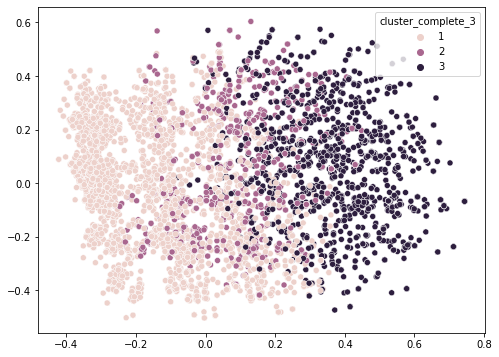

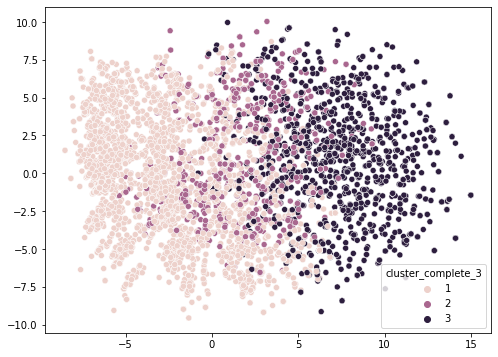

In [17]:
plot_tfidfVector('cluster_complete_3')
plot_dist('cluster_complete_3')

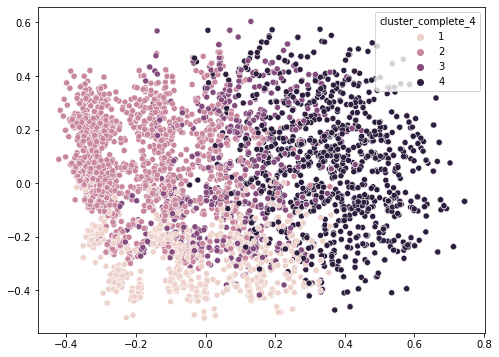

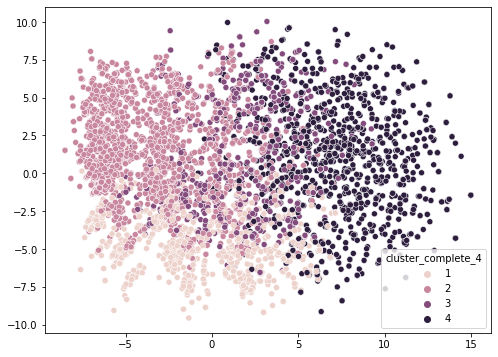

In [18]:
plot_tfidfVector('cluster_complete_4')
plot_dist('cluster_complete_4')

### Group average

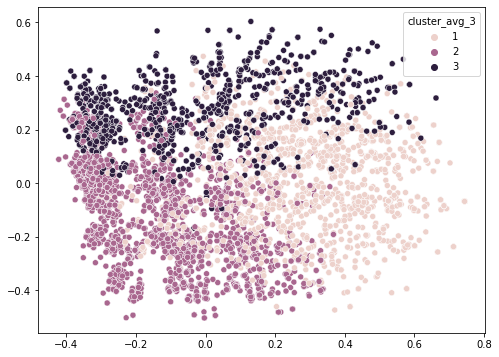

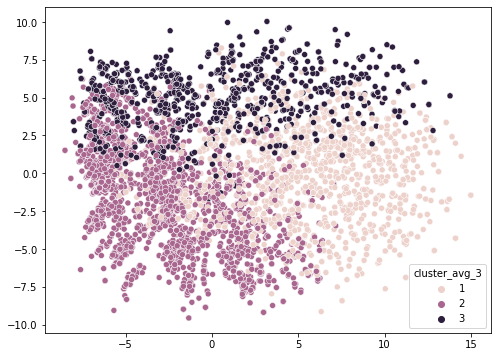

In [19]:
plot_tfidfVector('cluster_avg_3')
plot_dist('cluster_avg_3')

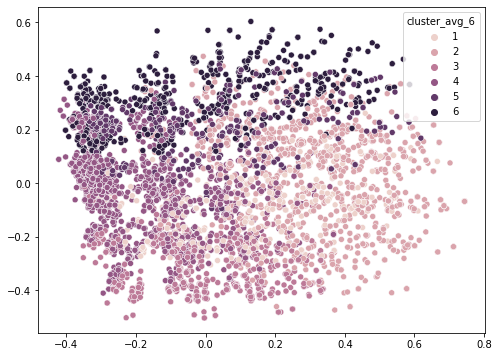

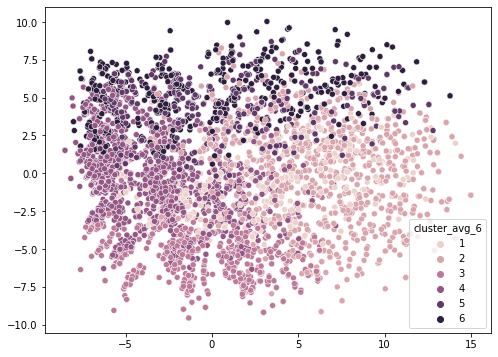

In [20]:
plot_tfidfVector('cluster_avg_6')
plot_dist('cluster_avg_6')

### Ward

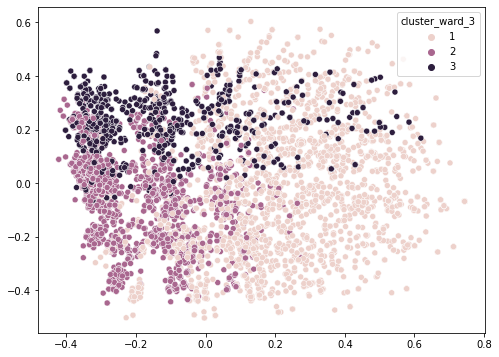

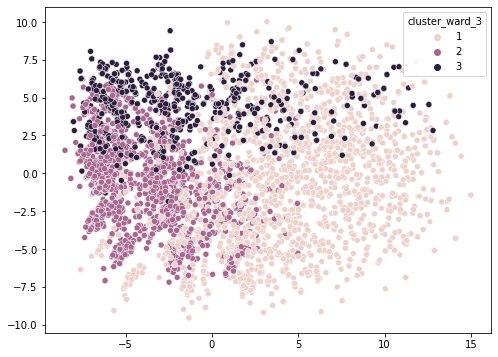

In [21]:
plot_tfidfVector('cluster_ward_3')
plot_dist('cluster_ward_3')

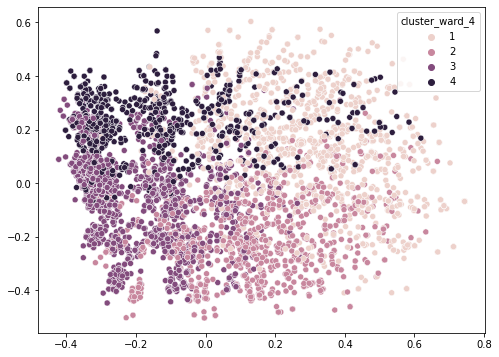

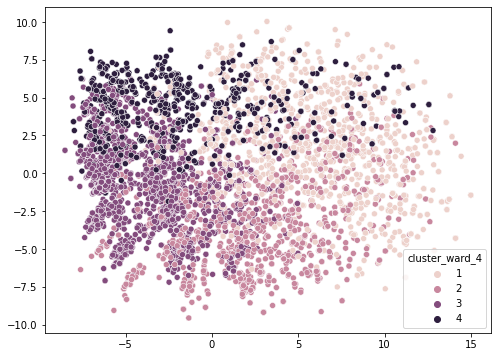

In [22]:
plot_tfidfVector('cluster_ward_4')
plot_dist('cluster_ward_4')

#**6. Multidimentional Scaling (MDS)**


---


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(dist) # dist

In [28]:
from sklearn.manifold import MDS
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_scaled)
# mds = MDS(2,random_state=0,dissimilarity='precomputed')
# X_2d = mds.fit_transform(dist)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"


In [30]:
color_3 = ['#e8d8db', '#af7b95', '#2e213b']
color_4 = ['#e8d8db', '#cc8c9c', '#834d7c', '#2e213b']
color_6 = ['#e7d4da', '#d0a0ae', '#af7b95', '#834d7c', '#613969', '#2e213b']

def mdsVisualization(clusterType, colors):
  plt.subplots(figsize=(8, 8))
  # plt.rcParams['figure.figsize'] = [7, 7]
  # plt.rc('font', size=14)
  for i in np.unique(clusterType):
    subset = X_2d[clusterType == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x, y, c=colors[i-1], label=i)
  plt.legend()
  plt.show()

### Complete-link

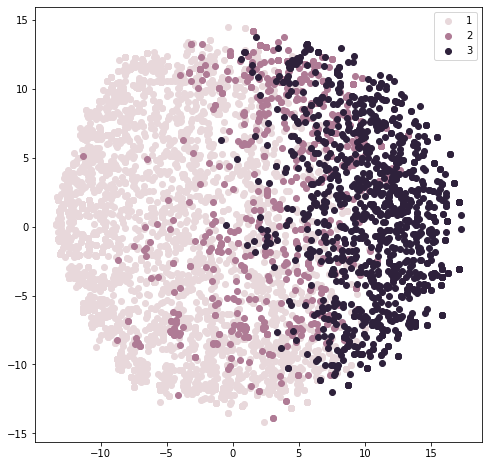

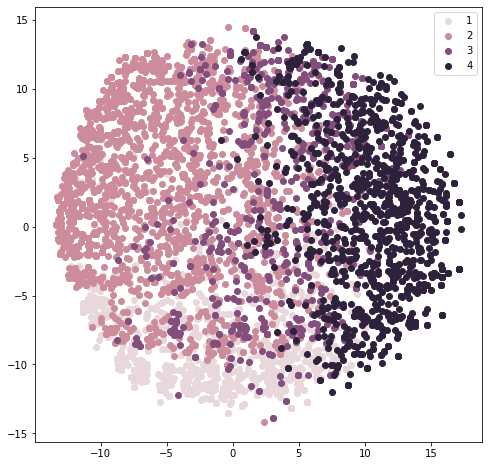

In [31]:
mdsVisualization(cluster_result.cluster_complete_3, color_3)
mdsVisualization(cluster_result.cluster_complete_4, color_4)

### Group average

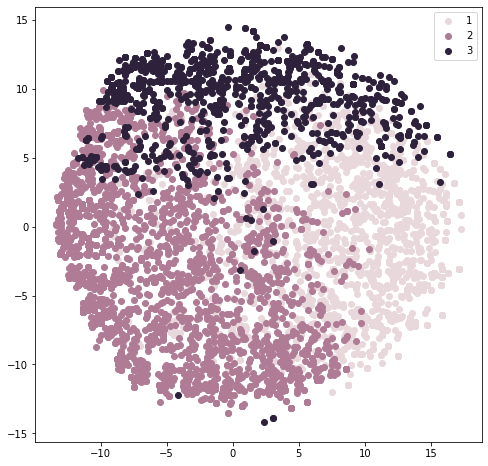

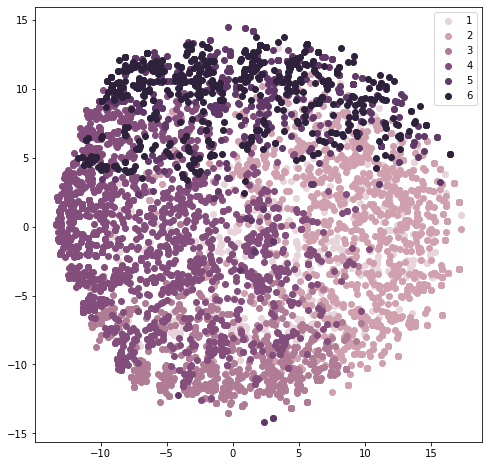

In [32]:
mdsVisualization(cluster_result.cluster_avg_3, color_3)
mdsVisualization(cluster_result.cluster_avg_6, color_6)

### Ward

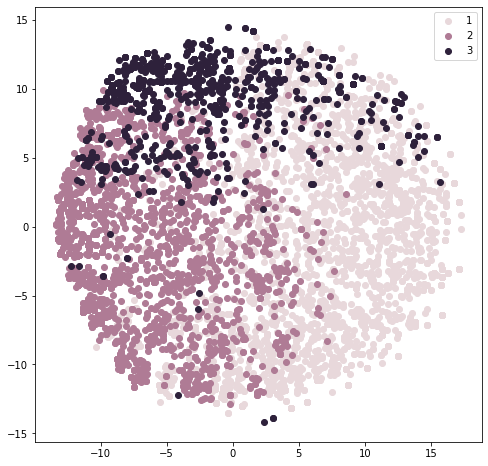

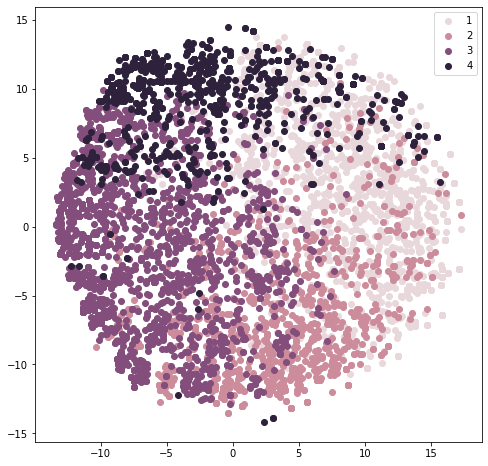

In [33]:
mdsVisualization(cluster_result.cluster_ward_3, color_3)
mdsVisualization(cluster_result.cluster_ward_4, color_4)